In [7]:
# imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [8]:
data_set = 'customers.csv'
df = pd.read_csv(data_set)

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [61]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


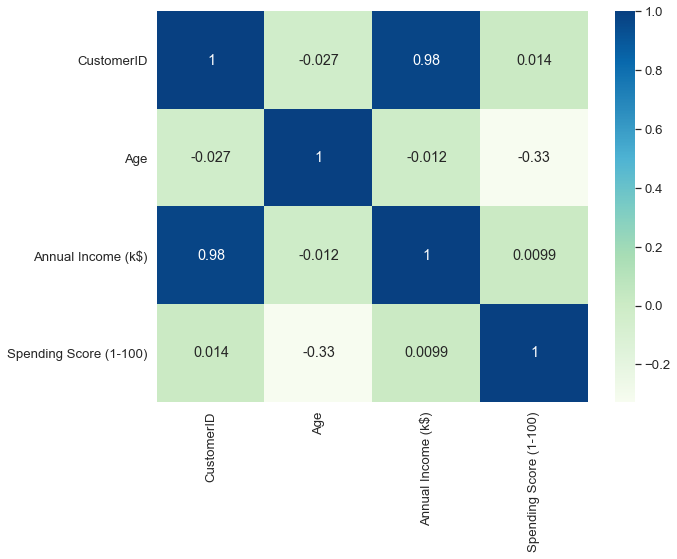

In [11]:
correlation = df.corr()
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='GnBu')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Age\n'}, xlabel='Age', ylabel='Density'>

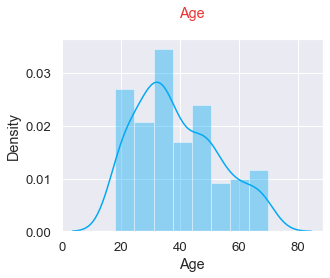

In [16]:

plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
plt.title('Age\n', color='#EB3434')
sns.distplot(df['Age'], color='#03A9F4')

<AxesSubplot:title={'center':'Spending Score\n'}, xlabel='Spending Score (1-100)', ylabel='Density'>

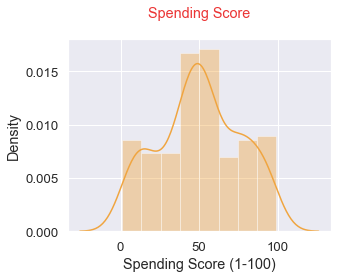

In [17]:

plt.figure(figsize=(16,12))

plt.subplot(3,3,1)
plt.title('Spending Score\n', color='#EB3434')
sns.distplot(df['Spending Score (1-100)'], color='#F0A540')

<AxesSubplot:title={'center':'Annual Income\n'}, xlabel='Annual Income (k$)', ylabel='Density'>

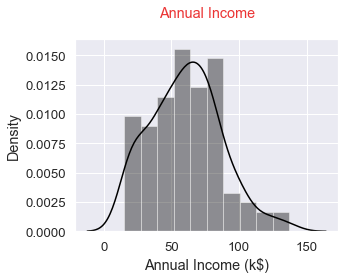

In [18]:
 
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
plt.title('Annual Income\n', color='#EB3434')
sns.distplot(df['Annual Income (k$)'], color='#000')


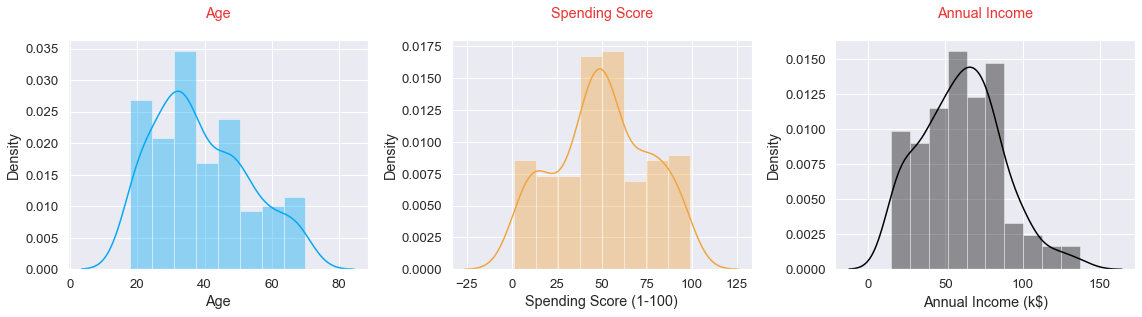

In [19]:


plt.figure(figsize=(16,12))


# Age
plt.subplot(3,3,1)
plt.title('Age\n', color='#EB3434')
sns.distplot(df['Age'], color='#03A9F4')

# Spending Score
plt.subplot(3,3,2)
plt.title('Spending Score\n', color='#EB3434')
sns.distplot(df['Spending Score (1-100)'], color='#F0A540')


# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='#EB3434')
sns.distplot(df['Annual Income (k$)'], color='#000')


plt.tight_layout()

In [66]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.02, 'Count of Male and Female')

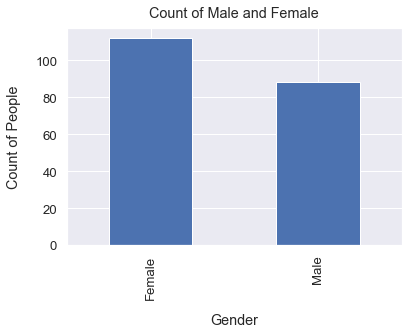

In [70]:
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender",labelpad=14)
plt.ylabel("Count of People",labelpad=14)
plt.title("Count of Male and Female",y=1.02)

In [78]:
df.rename(columns={'Spending Score (1-100)':'amount'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),amount
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.02, 'Mean spending amount')

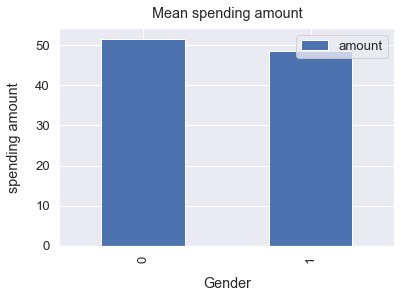

In [83]:
df.groupby('Gender',as_index=False).amount.mean().plot(kind='bar')
plt.xlabel("Gender",labelpad=14)
plt.ylabel("spending amount",labelpad=14)
plt.title("Mean spending amount",y=1.02)

In [85]:
df.rename(columns={'amount':'Spending Score (1-100)'},inplace=True)

Text(0.5, 1.0, 'Annual Income Vs Spending Score\n')

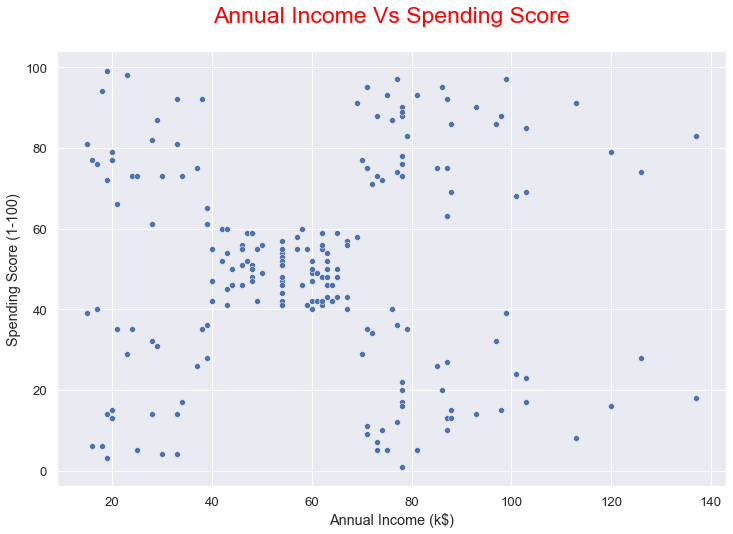

In [20]:


plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")
plt.title('Annual Income Vs Spending Score\n', size = 23, color='red')

Text(0.5, 1.0, 'Age Vs Spending Score\n')

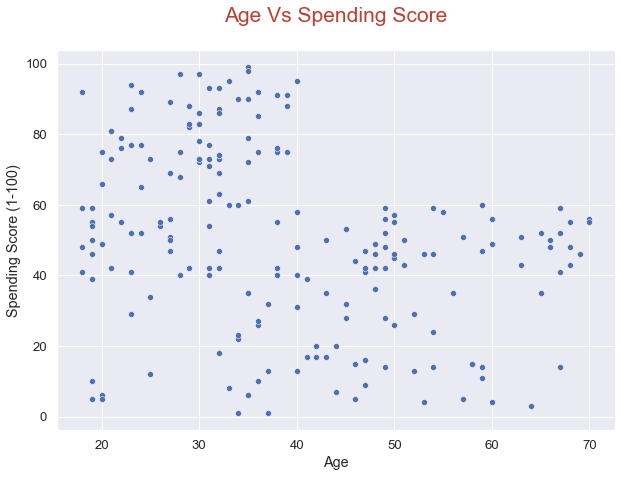

In [24]:


plt.figure(figsize=(10,7))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'])
plt.title('Age Vs Spending Score\n', size = 21, color='#BD3F32')

In [25]:

age_income = df[['Age','Annual Income (k$)']].values

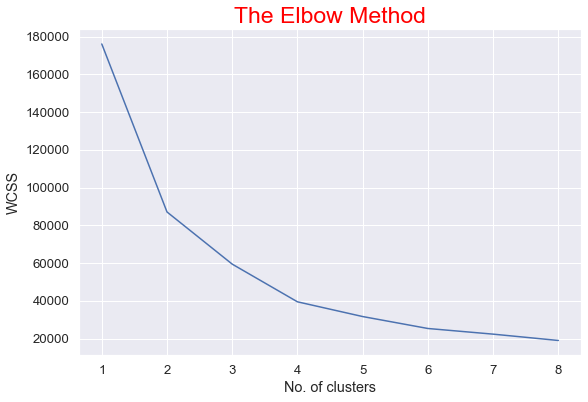

In [27]:


from sklearn.cluster import KMeans
wcss_age_income = []

for i in range(1,9):
    kmeans_age_income = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_age_income.fit(age_income)
    wcss_age_income.append(kmeans_age_income.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 9), wcss_age_income)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('No. of clusters')
plt.xticks(np.arange(1,9))
plt.ylabel('WCSS')
plt.show()

In [28]:

kmeans_var_age_income = KMeans(n_clusters = 3, init ='k-means++', random_state=68)
selected_kmeans = kmeans_var_age_income.fit_predict(age_income)

<function matplotlib.pyplot.show(close=None, block=None)>

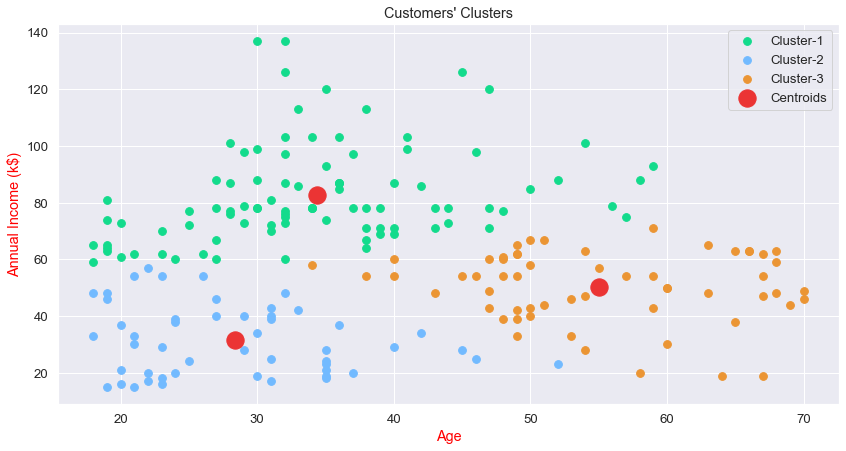

In [29]:


plt.figure(1 , figsize = (14 ,7))
plt.scatter(age_income[selected_kmeans == 0, 0], age_income[selected_kmeans == 0, 1], s = 60, c = '#13DB8C', label = 'Cluster-1')
plt.scatter(age_income[selected_kmeans == 1, 0], age_income[selected_kmeans == 1, 1], s = 60, c = '#72BAFF', label = 'Cluster-2')
plt.scatter(age_income[selected_kmeans == 2, 0], age_income[selected_kmeans == 2, 1], s = 60, c = '#EB9534', label = 'Cluster-3')
plt.scatter(kmeans_var_age_income.cluster_centers_[:, 0], kmeans_var_age_income.cluster_centers_[:, 1], s = 300, c = '#eb3434', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Annual Income (k$)', color='red')
plt.legend()
plt.show

In [30]:

middle = df[['Annual Income (k$)','Spending Score (1-100)']].values

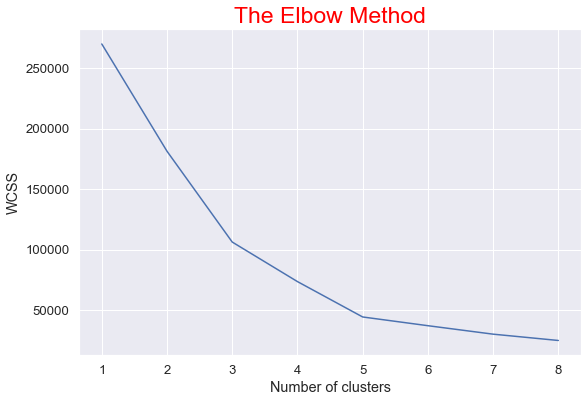

In [31]:

wcss_middle = []

for i in range(1,9):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(middle)
    wcss_middle.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 9), wcss_middle)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,9))
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans_middle = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
middle_kmeans = kmeans_middle.fit_predict(middle)

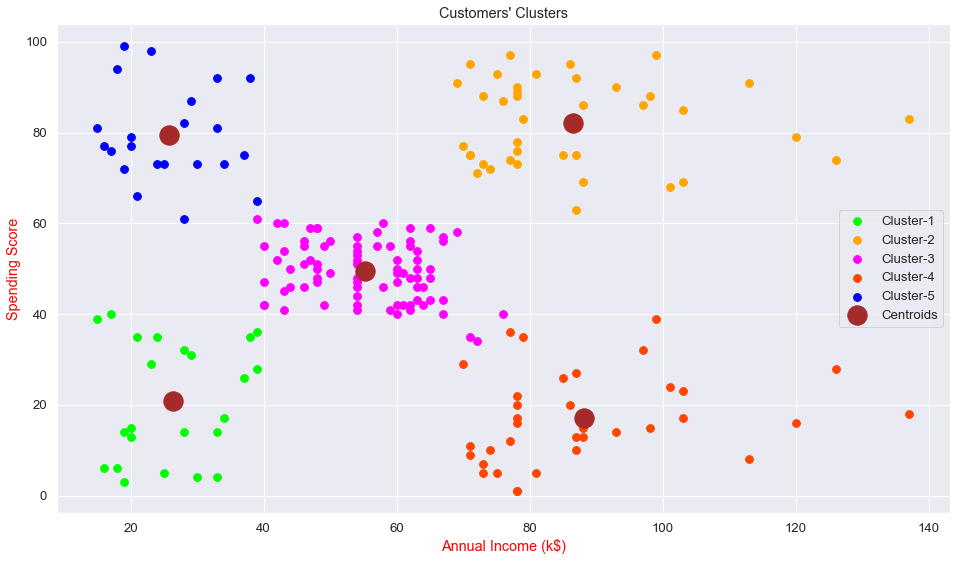

In [33]:

plt.figure(1 , figsize = (16 ,9))
plt.scatter(middle[middle_kmeans == 0, 0], middle[middle_kmeans == 0, 1], s = 60, c = '#00FF00', label = 'Cluster-1')
plt.scatter(middle[middle_kmeans == 1, 0], middle[middle_kmeans == 1, 1], s = 60, c = 'orange', label = 'Cluster-2')
plt.scatter(middle[middle_kmeans == 2, 0], middle[middle_kmeans == 2, 1], s = 60, c = '#FF00FF', label = 'Cluster-3')
plt.scatter(middle[middle_kmeans == 3, 0], middle[middle_kmeans == 3, 1], s = 60, c = '#FF4500', label = 'Cluster-4')
plt.scatter(middle[middle_kmeans == 4, 0], middle[middle_kmeans == 4, 1], s = 60, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans_middle.cluster_centers_[:, 0], kmeans_middle.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Annual Income (k$)', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()

In [34]:

newx = df[['Age','Spending Score (1-100)']].values

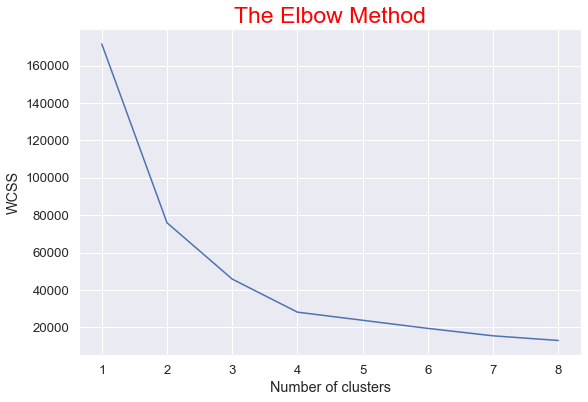

In [35]:

wcss_new = []

for i in range(1,9):
    kmeans_test_new = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test_new.fit(newx)
    wcss_new.append(kmeans_test_new.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 9), wcss_new)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,9))
plt.ylabel('WCSS')
plt.show()

In [36]:

kmeans_new = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
last_kmeans = kmeans_new.fit_predict(newx)

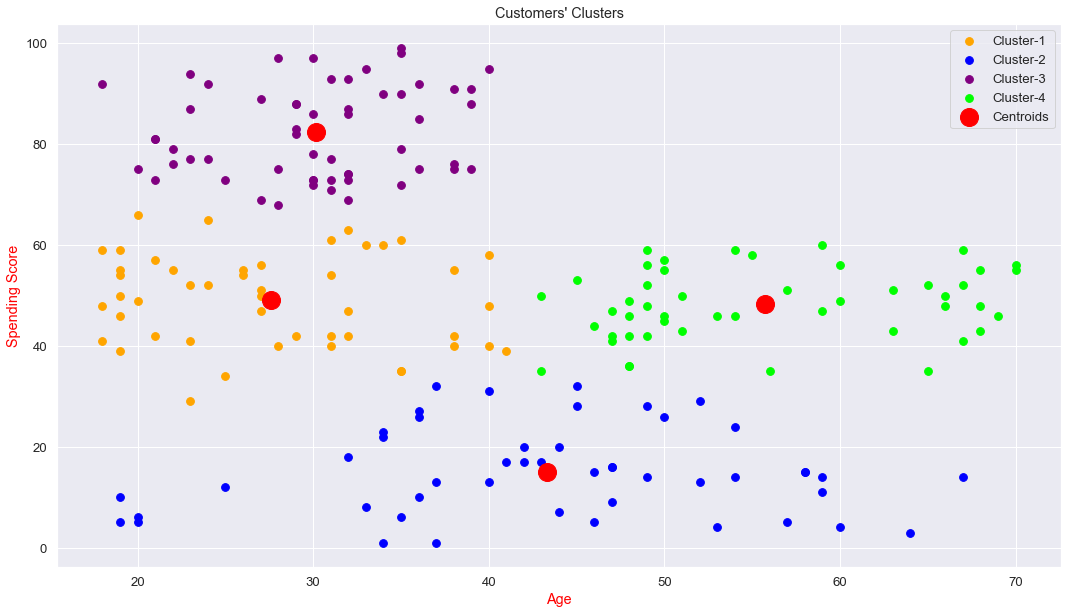

In [38]:

plt.figure(1 , figsize = (18 ,10))
plt.scatter(newx[last_kmeans == 0, 0], newx[last_kmeans == 0, 1], s = 60, c = 'orange', label = 'Cluster-1')
plt.scatter(newx[last_kmeans == 1, 0], newx[last_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster-2')
plt.scatter(newx[last_kmeans == 2, 0], newx[last_kmeans == 2, 1], s = 60, c = 'purple', label = 'Cluster-3')
plt.scatter(newx[last_kmeans == 3, 0], newx[last_kmeans == 3, 1], s = 60, c = 'lime', label = 'Cluster-4')
plt.scatter(kmeans_new.cluster_centers_[:, 0], kmeans_new.cluster_centers_[:, 1], s = 325, c = 'red', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()